In [1]:
#import libraries
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#load dataframe using csv format 
df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


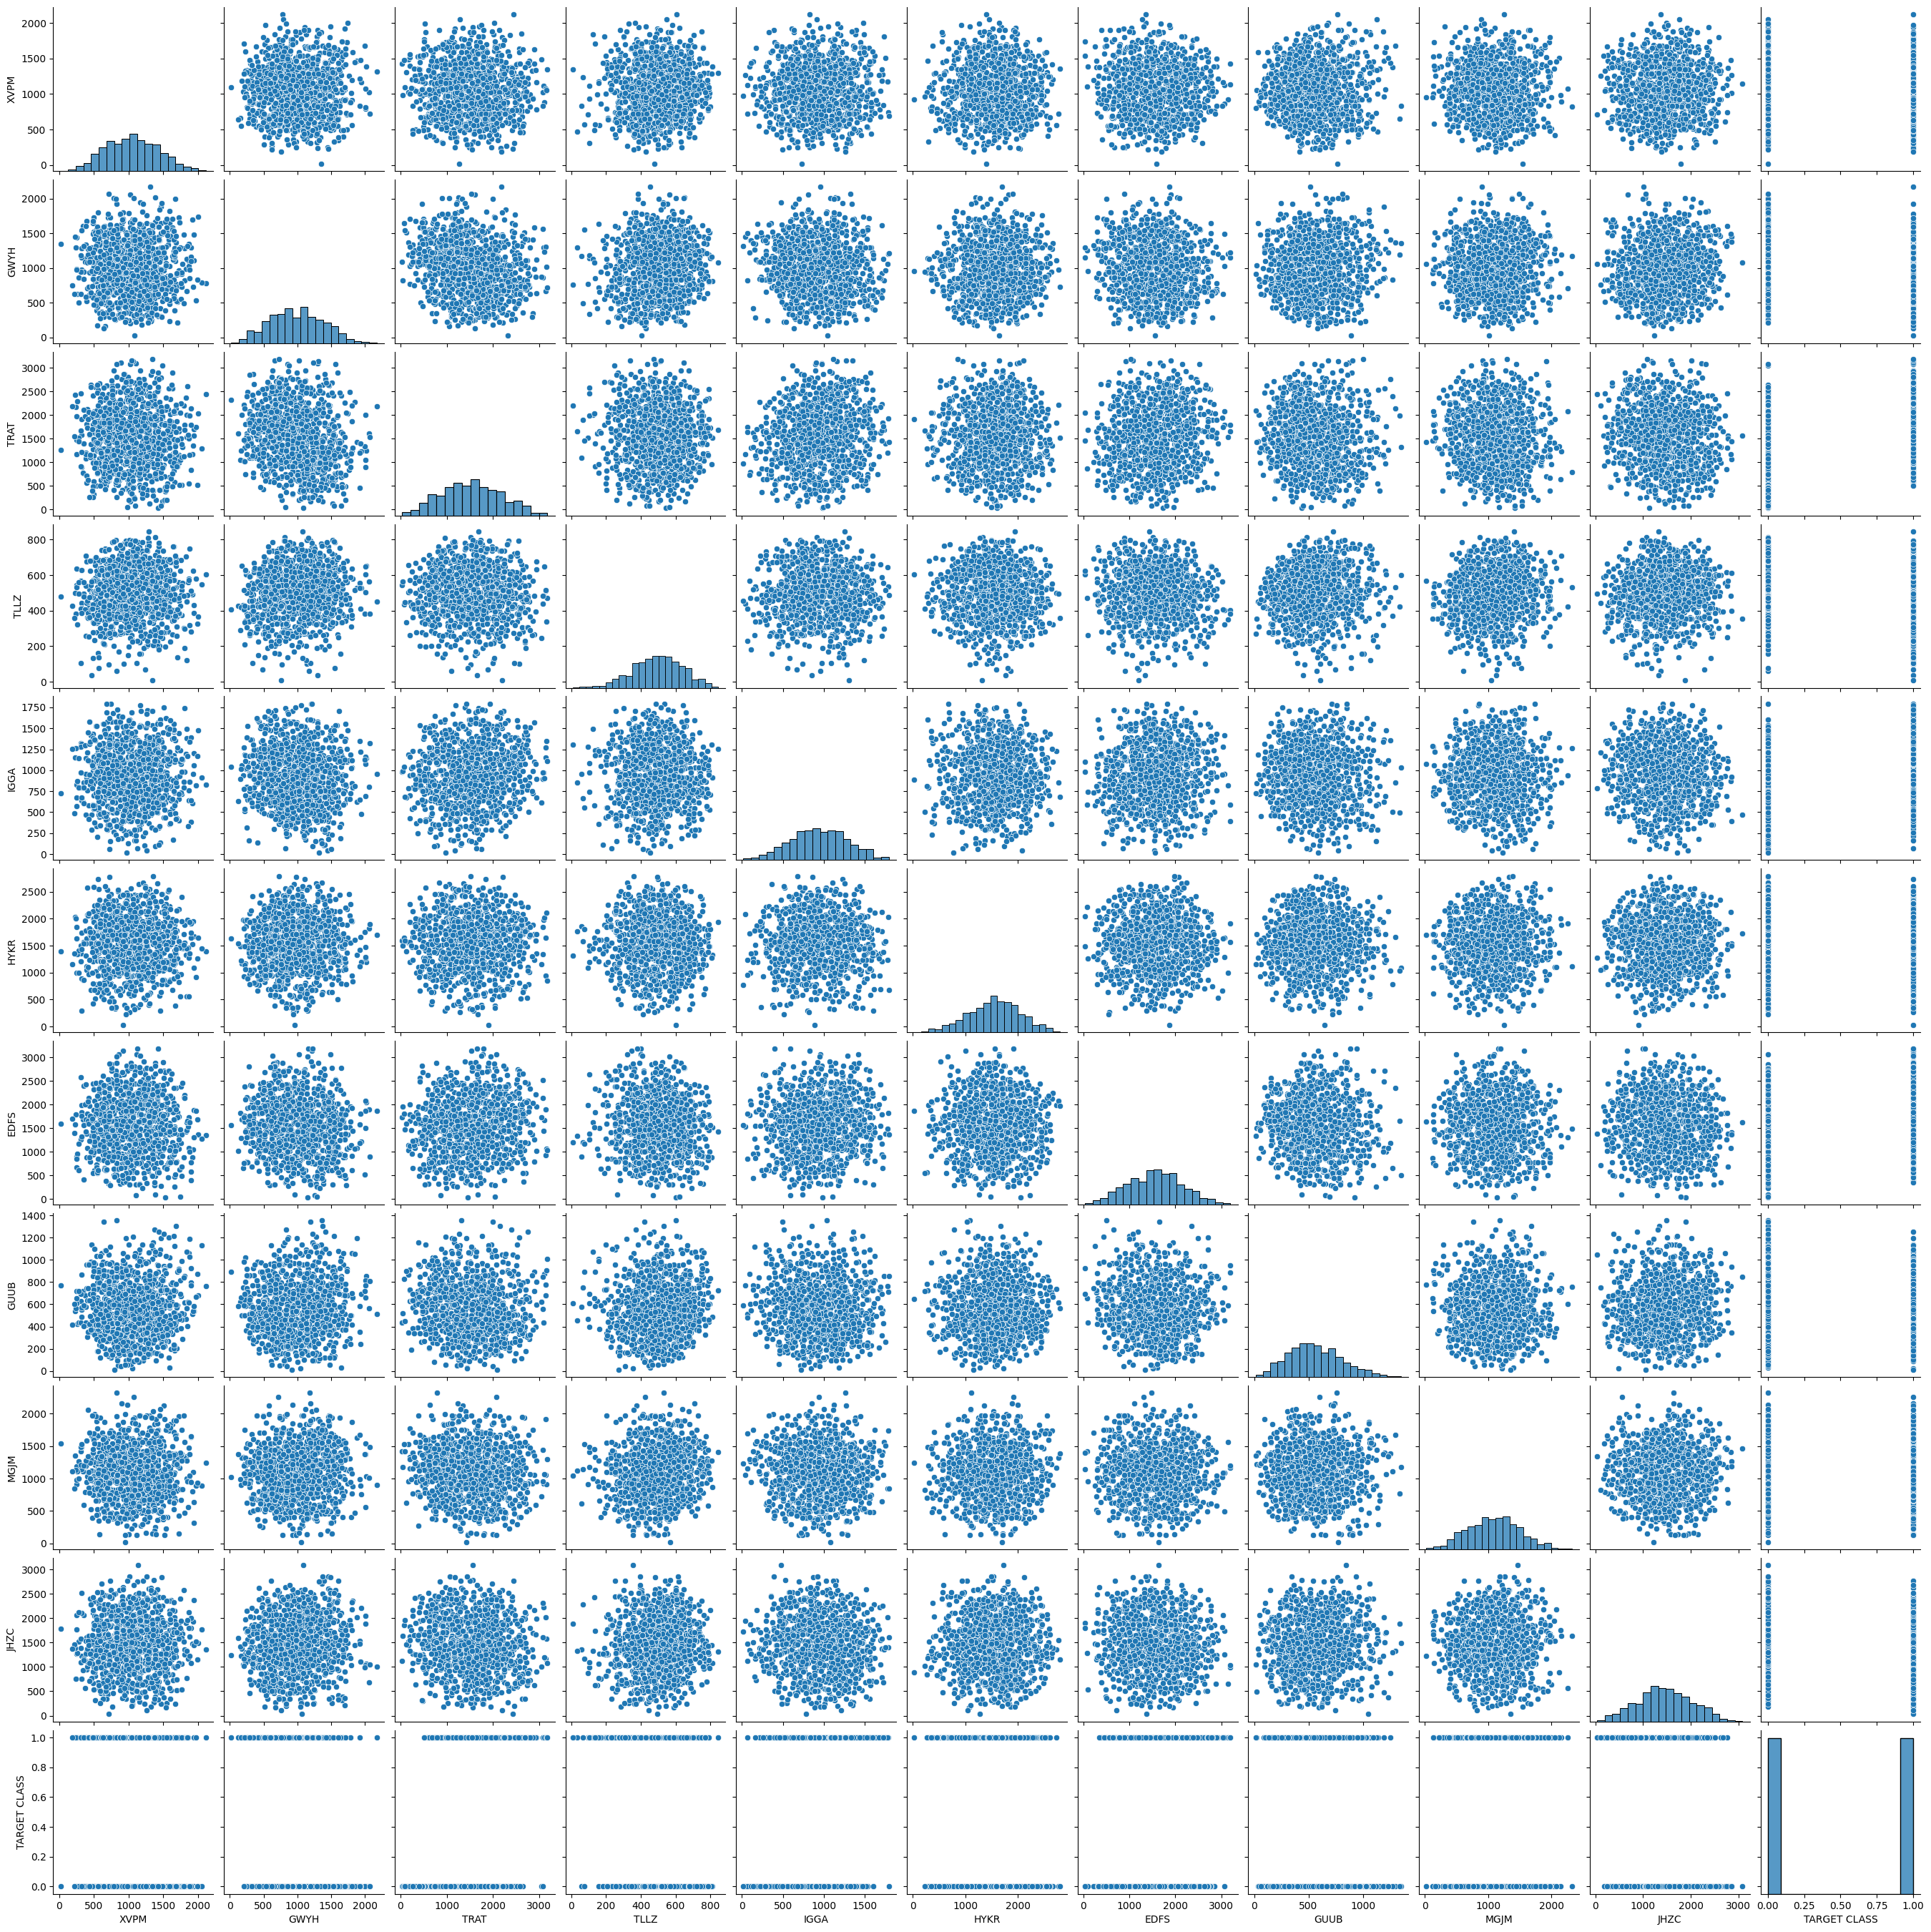

In [5]:
#using a large pairplot for EDA
sns.pairplot(data=df)
plt.show()

In [6]:
#standardizing the variables
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
#fitting scaler to features
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [10]:
#transforming the feautures to a scaled version
Scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))
Scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [11]:
#converting Scaled_features into a data frame 
df_feat = pd.DataFrame(Scaled_features, columns = df.columns[:-1])
df_feat

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [15]:
#splitting data into training set and testing set
from sklearn.model_selection import train_test_split

In [16]:
X = df_feat
y = df['TARGET CLASS']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.30, random_state = 101)

In [19]:
#importing KNeighborsClassifier to create a KNN model instance with n_neighbors=1
from sklearn.neighbors import KNeighborsClassifier


In [20]:
#KNN model instance with n = 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
#predict values using your KNN model and X_test
Pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test,Pred))
print(classification_report(y_test, Pred))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [29]:
#using the elbow method to pick a correct k value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    Pred_i = knn.predict(X_test)
    error_rate.append(np.mean(Pred_i != y_test))

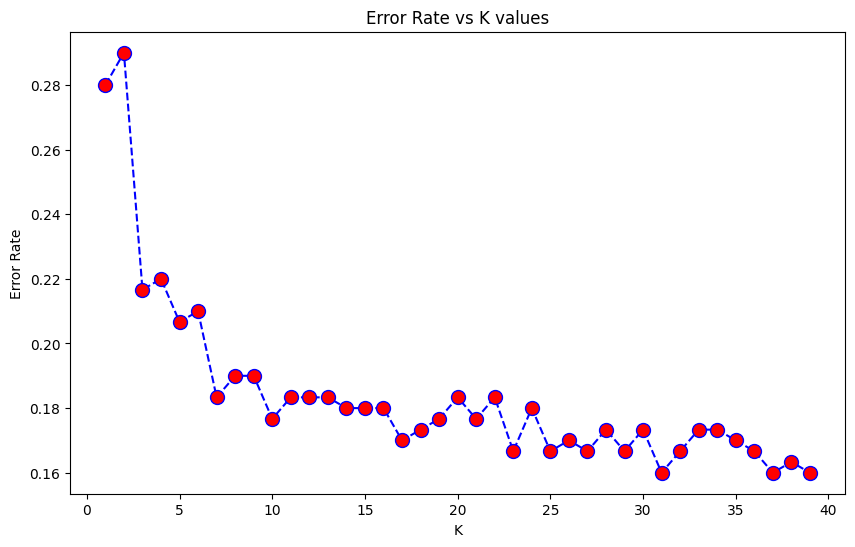

In [30]:
## plot in graph
plt.figure(figsize =(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle ='dashed',marker='o',
         markerfacecolor='red', markersize = 10)
plt.title('Error Rate vs K values')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [31]:
#retraining my model with my best K Values 
knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [32]:
#predict values using my k best values and X_test
Pred = knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test,Pred))
print(classification_report(y_test, Pred))

[[125  27]
 [ 21 127]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

